<h1>Network Model</h1>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [49]:
class agent:
    
    def __init__ (self, x, y):
        self.x = x
        self.y = y
        self.mobility = np.random.random()
        self.contacts = []
        self.status = 's'
    
    def infect(self):
        if self.status == 's':
            self.status = 'i'
    
    def recover(self):
        if self.status == 'i':
            self.status = 'r'
    
def logistic(x):
    return np.exp(x)/(1+np.exp(x))
    
def distance(r):
    return np.sqrt((self.x-r[0])**2+(self.y-r[1])**2)

def census(population):
    
    #create an array of statuses
    statuses = np.array([individual.status for individual in population])

    #vectorized for loops counting statuses 
    s = np.sum(statuses == 's')
    i = np.sum(statuses == 'i')
    r = np.sum(statuses == 'r')
    
    return np.array([s, i, r])


def epidemic1D(pt,population):

    N = population.size
    
    for n in range(N):
        
        #check if the indidual is infected
        if population[n].status=='i':
            
            #infect the susceptible others with a certain probability
            for index in population[n].contacts:
                indicies = np.random.rand()
                if np.random.rand()<pt:
                    population[index].infect()
                    
            #put the infected individual in the recovered state
            population[n].recover()
            
    return population
            

def simulate1D(pt, N, total_population):
    
    #list of the sir populations by week
    sir = []
    
    #creates an array of the class agent
    radius = 0.5
    network_parameter = 1
    population_centers = np.array([ [10*np.random.random(),10*np.random.random()] for n in range(total_population) ])
    indices = np.random.choice(N,size=total_population)
    individual_locations = population_centers[indices]+np.random.normal(0,radius,(total_population,2))
    xs = individual_locations[:,0]
    ys = individual_locations[:,1]
    population = np.array([agent(xs[n], ys[n]) for n in range(total_population)])
    
    #create network
    for n in range(total_population):
        for m in range(total_population):
            d = np.sqrt((population[n].x-population[m].x)**2+(population[n].y-population[m].y)**2)
            log = np.exp(-d/population[n].mobility*network_parameter)/(1+np.exp(-d/population[n].mobility*network_parameter))
            if np.random.random() < log and d > 0.00001:
                population[n].contacts.append(m)
                population[m].contacts.append(n)
    
    #randomly infect 10 percent
    indices = np.random.choice(np.arange(total_population),total_population//100,replace=False)
    for index in indices:
        population[index].infect()
        
    #record initial populations
    state = census(population)
    sir.append(state)
    
    #simulate the remaining weeks
    while state[1]>0:
        new_population=epidemic1D(pt,population)
        state = census(new_population)
        sir.append(state)
        population = new_population
        
    return np.array(sir), population, individual_locations

In [50]:
total_population = 100
N = 5
radius = 0.2
sir, population, locations = simulate1D(0.3, 5, 100)

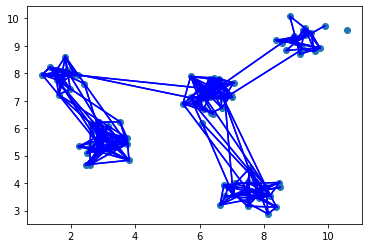

In [51]:
plt.scatter(locations[:,0],locations[:,1])
for pupil in population:
    for contact in pupil.contacts:
        friend = population[contact]
        plt.plot([pupil.x,friend.x],[pupil.y,friend.y],color='b')

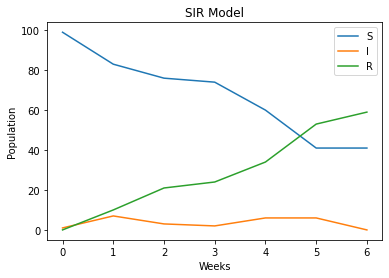

In [52]:
# plot results
t = np.arange(len(sir[:,0]))
plt.plot(t, sir[:,0], label="S")
plt.plot(t, sir[:,1], label="I")
plt.plot(t, sir[:,2], label="R")
plt.legend()
plt.title('SIR Model')
plt.xlabel('Weeks')
plt.ylabel('Population')
plt.show()

AttributeError: 'list' object has no attribute 'shape'